# PyTao

[PyTao](https://bmad-sim.github.io/pytao/) is just a wrapper of Tao, but it allows one to use matplotlib, etc. plotting as a backend, although the original Tao backend is also an option.

For 

In [1]:
# conda install -c conda-forge pytao

In [2]:
from pytao import Tao
import matplotlib.pyplot as plt
from pathlib import Path 

In [3]:
init_file = Path.cwd() / "tao.init" # make sure Path.cwd() is this directory
# print(init_file)

# only one tao instance can exist at a time
tao = Tao(init_file=init_file, plot="mpl")
# although multiple universes are still allowed

In [4]:
display(tao.show('lat'))
display(tao.show('plot'))

['# Values shown are for the Downstream End of each Element (Girder elements shown at ref point):',
 '# Index  name      key                       s       l    beta   phi_a    eta   orbit    beta   phi_b    eta   orbit  Track',
 '#                                                            a   [2pi]      x  x [mm]       b   [2pi]      y  y [mm]  State',
 '      0  BEGINNING Beginning_Ele         0.000     ---   10.00   0.000   0.00   0.000   10.00   0.000   0.00   0.000  Alive',
 '      1  D         Drift                 0.500   0.500   10.03   0.008   0.00   0.000   10.03   0.008   0.00   0.000  Alive',
 '      2  B         SBend                 1.000   0.500    8.65   0.016   0.12  -0.122    9.12   0.016   0.00   0.000  Alive',
 '      3  Q         Quadrupole            1.600   0.600    4.47   0.031   0.40  -0.401    8.87   0.027   0.00   0.000  Alive',
 '      4  END       Marker                1.600   0.000    4.47   0.031   0.40  -0.401    8.87   0.027   0.00   0.000  Alive',
 '# 

['',
 'Plot Region         <-->  Plot                 Visible',
 '-----------               ----------------------------',
 'layout              <-->                       F',
 'r11                 <-->                       F',
 'r12                 <-->                       F',
 'r22                 <-->                       F',
 'r13                 <-->                       F',
 'r23                 <-->                       F',
 'r33                 <-->                       F',
 'r14                 <-->                       F',
 'r24                 <-->                       F',
 'r34                 <-->                       F',
 'r44                 <-->                       F',
 'layout12            <-->                       F',
 'layout22            <-->                       F',
 'r1121               <-->                       F',
 'r2121               <-->                       F',
 'r1122               <-->                       F',
 'r1222               <-->   

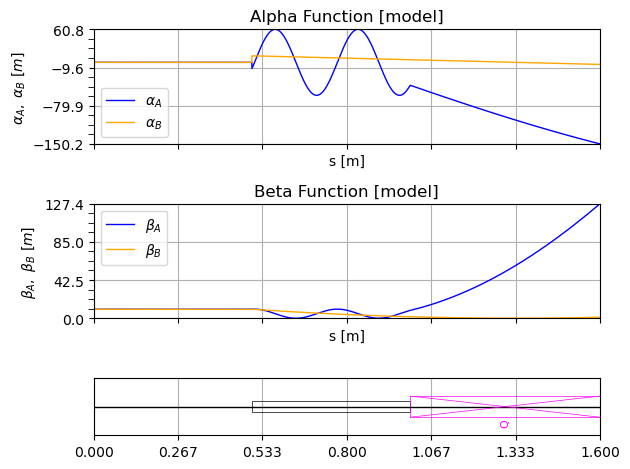

In [11]:
tao.plot(["alpha", "beta"])

In [6]:
# general tao commands
tao.cmd('write ps pytao_pdf_plotting.ps')
# verbose=True will display tao command below cell
s = tao.lat_list("*", "ele.s", verbose=True) 
display(s)

pipe lat_list -array_out -track_only @>>*|model ele.s


array([0. , 0.5, 1. , 1.6, 1.6])

In [7]:
# dir(Tao)
tao.data_d2?

Signature:
tao.data_d2(
    d2_name,
    *,
    ix_uni='',
    verbose=False,
    as_dict=True,
    raises=True,
)
Docstring:
Output information on a d2_datum.

Parameters
----------
d2_name
ix_uni : optional

Returns
-------
string_list

Notes
-----
Command syntax:
  pipe data_d2 {ix_uni}@{d2_name}

Where:
  {ix_uni} is a universe index. Defaults to s%global%default_universe.
  {d2_name} is the name of the d2_data structure.

Examples
--------
Example: 1
 init: -init $ACC_ROOT_DIR/regression_tests/pipe_test/tao.init_optics_matching
 args:
   ix_uni: 1
   d2_name: twiss
File:      ~/anaconda3/envs/bmadenv/lib/python3.14/site-packages/pytao/interface_commands.py
Type:      method

Alongside `tao.cmd` we can also use Jupyter's magic `%%tao` to write tao directly into code cells

In [8]:
%%tao
place r22 floor_plan
set ele 2 angle = 6
help scale
scale

-------------------------
Tao> place r22 floor_plan
------------------------
Tao> set ele 2 angle = 6
---------------
Tao> help scale
The "scale" command scales the vertical axis of a graph or set of graphs.  Format:
  scale {-exact} {-gang} {-include_wall} {-nogang}
             {-y} {-y2} {<where> {<value1> {<value2>}}}

Which graphs are scaled is determined by the "<where>" switch. If "<where>" is not present or
"<where>" is "all" then all graphs are scaled. "<where>" can be a plot name or the name of
an individual graph withing a plot.

"scale" adjusts the vertical scale of graphs. If neither "<value1>" nor "<value2>" is
present then an "autoscale" is performed and the scale is adjusted so that all the data points
are within the graph region. If an autoscale is performed upon an entire plot, and if
"plot%autoscale_gang_y"  is True, then the chosen scales will be the same for
all graphs. That is, a single scale is calculated so that all the data of all the graphs is within
the plot 

However, plotting setup is a bit more complicated. After running the above, the plot doesn't look great.

In [10]:
tao.plot()

UnsupportedGraphError: No supported plots from these templates: []